In [83]:
import numpy as np
import pandas as pd
from pprint import pprint
import math

In [84]:
data = pd.read_csv("resources/dataset_train.csv")
data.head(5)

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston      Gibbs  1998-09-27      Left   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     58384.0 -487.886086   5.727180                       4.878861   
1     67239.0 -552.060507  -5.987446                       5.520605   
2     23702.0 -366.076117   7.725017                       3.660761   
3     32667.0  697.742809  -6.497214                      -6.977428   
4     60158.0  436.775204  -7.820623                            NaN   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722      272.035831     532.484226          5.231058   
1      -5.612     -487.340557     367.760303          4.107170   
2       6.140      664.893521     602.585284          3.555579   
3       4.026     -537.001128     523.982133         -4.809637   
4       2.236     -444.262537     599.324514         -3.444377   

   Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0      1039.788281  3.790369                   0.715939 -232.79405  -26.89  
1      1058.944592  7.248742                   0.091674 -252.18425 -113.45  
2      1088.088348  8.728531                  -0.515327 -227.34265   30.42  
3       920.391449  0.821911                  -0.014040 -256.84675  200.64  
4       937.434724  4.311066                  -0.264070 -256.38730  157.98

In [85]:
data = data.fillna(data.mean())
data.head(5)

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston      Gibbs  1998-09-27      Left   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     58384.0 -487.886086   5.727180                       4.878861   
1     67239.0 -552.060507  -5.987446                       5.520605   
2     23702.0 -366.076117   7.725017                       3.660761   
3     32667.0  697.742809  -6.497214                      -6.977428   
4     60158.0  436.775204  -7.820623                      -0.387863   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722      272.035831     532.484226          5.231058   
1      -5.612     -487.340557     367.760303          4.107170   
2       6.140      664.893521     602.585284          3.555579   
3       4.026     -537.001128     523.982133         -4.809637   
4       2.236     -444.262537     599.324514         -3.444377   

   Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0      1039.788281  3.790369                   0.715939 -232.79405  -26.89  
1      1058.944592  7.248742                   0.091674 -252.18425 -113.45  
2      1088.088348  8.728531                  -0.515327 -227.34265   30.42  
3       920.391449  0.821911                  -0.014040 -256.84675  200.64  
4       937.434724  4.311066                  -0.264070 -256.38730  157.98

In [86]:
column_list = list(data.columns)
column_list

['Index',
 'Hogwarts House',
 'First Name',
 'Last Name',
 'Birthday',
 'Best Hand',
 'Arithmancy',
 'Astronomy',
 'Herbology',
 'Defense Against the Dark Arts',
 'Divination',
 'Muggle Studies',
 'Ancient Runes',
 'History of Magic',
 'Transfiguration',
 'Potions',
 'Care of Magical Creatures',
 'Charms',
 'Flying']

In [87]:
for name in column_list[6:19] :
    data[name] = (data[name] - data[name].mean()) / (data[name].max() - data[name].min())
data.head(5)

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston      Gibbs  1998-09-27      Left   

   Arithmancy  Astronomy  Herbology  Defense Against the Dark Arts  \
0    0.067654  -0.266110   0.209332                   2.656001e-01   
1    0.136124  -0.298473  -0.325374                   2.979632e-01   
2   -0.200521  -0.204681   0.300522                   2.041715e-01   
3   -0.131200   0.331801  -0.348642                  -3.323108e-01   
4    0.081371   0.200195  -0.409048                   2.799419e-18   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0    0.083591        0.227927       0.079597          0.109306   
1   -0.467291       -0.120589      -0.277314          0.055140   
2    0.159182        0.408229       0.231487          0.028555   
3    0.046489       -0.143381       0.061176         -0.374613   
4   -0.048932       -0.100819       0.224422         -0.308813   

   Transfiguration   Potions  Care of Magical Creatures    Charms    Flying  
0         0.050389 -0.118459                   0.120775  0.297028 -0.106067  
1         0.149990  0.071205                   0.022778 -0.247323 -0.294020  
2         0.301519  0.152359                  -0.072509  0.450068  0.018374  
3        -0.570400 -0.281254                   0.006183 -0.378216  0.387984  
4        -0.481785 -0.089903                  -0.033067 -0.365317  0.295353

In [88]:
df = data[column_list[6:18]]
df.head(5)

Arithmancy  Astronomy  Herbology  Defense Against the Dark Arts  \
0    0.067654  -0.266110   0.209332                   2.656001e-01   
1    0.136124  -0.298473  -0.325374                   2.979632e-01   
2   -0.200521  -0.204681   0.300522                   2.041715e-01   
3   -0.131200   0.331801  -0.348642                  -3.323108e-01   
4    0.081371   0.200195  -0.409048                   2.799419e-18   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0    0.083591        0.227927       0.079597          0.109306   
1   -0.467291       -0.120589      -0.277314          0.055140   
2    0.159182        0.408229       0.231487          0.028555   
3    0.046489       -0.143381       0.061176         -0.374613   
4   -0.048932       -0.100819       0.224422         -0.308813   

   Transfiguration   Potions  Care of Magical Creatures    Charms  
0         0.050389 -0.118459                   0.120775  0.297028  
1         0.149990  0.071205                   0.022778 -0.247323  
2         0.301519  0.152359                  -0.072509  0.450068  
3        -0.570400 -0.281254                   0.006183 -0.378216  
4        -0.481785 -0.089903                  -0.033067 -0.365317

### MATPLOTLIB

In [89]:
import matplotlib.pyplot as plt

### V.2.1 Matplotlib Histogram

Faites un script nommé histogram.[extension] qui affiche un histogram répondant
à la question suivante :
Quel cours de Poudlard a une répartition des notes homogènes entre les quatres maisons ?

(array([  2.,   3.,  20., 117., 304., 508., 397., 186.,  54.,   9.]),
 array([-0.57223273, -0.47223273, -0.37223273, -0.27223273, -0.17223273,
        -0.07223273,  0.02776727,  0.12776727,  0.22776727,  0.32776727,
         0.42776727]),
 <a list of 10 Patch objects>)

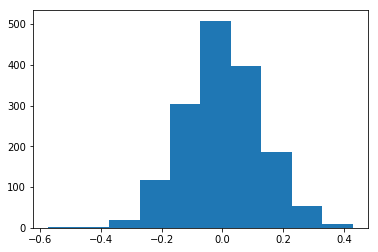

In [90]:
plt.hist(df['Arithmancy'], bins=10)

In [91]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,16), dpi= 100)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name[:6]+"Distr")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

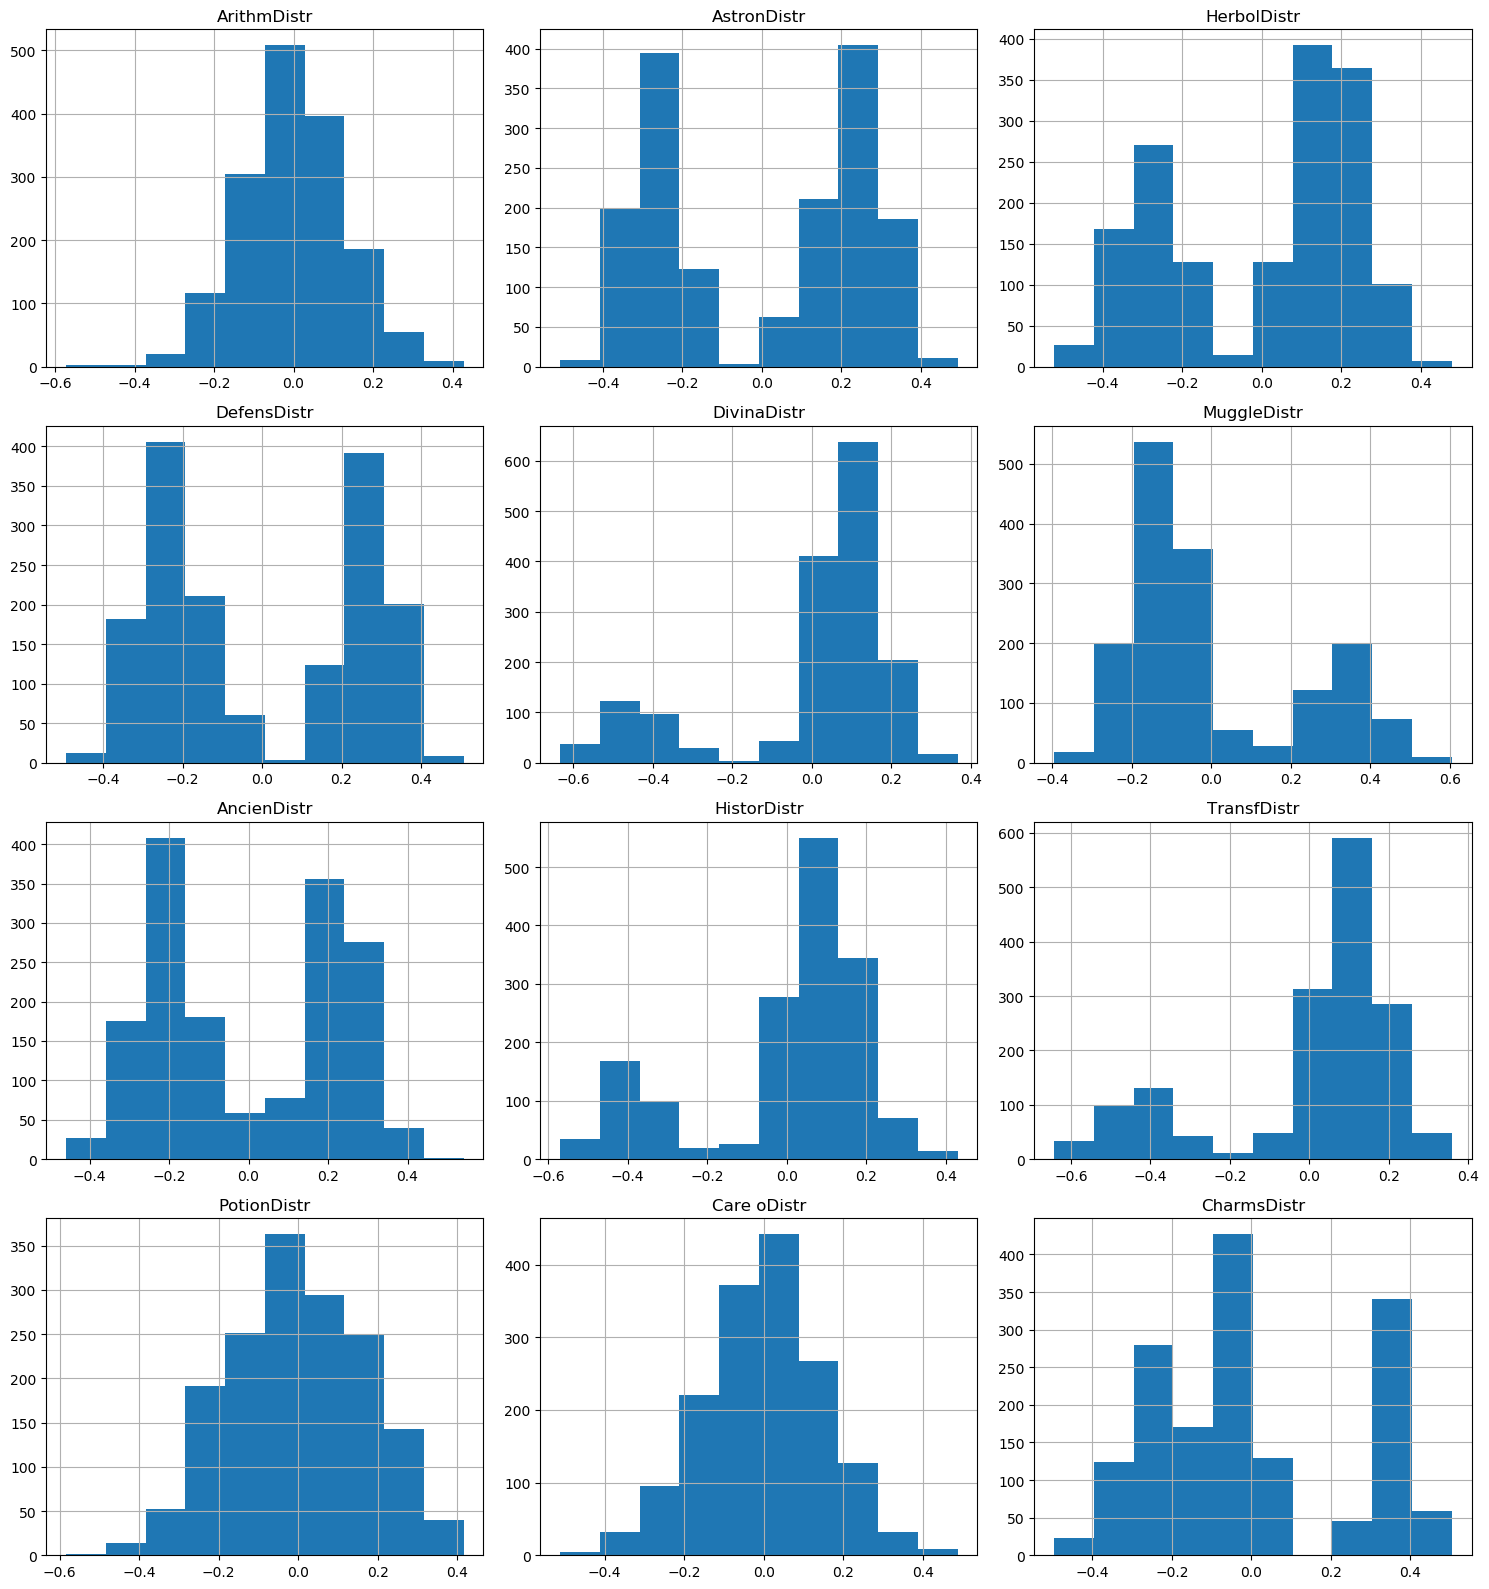

In [92]:
variables = column_list[6:18]
draw_histograms(df, variables, 4, 3)

### V.2.2 MatplotLib Scatterplot

Faites un script nommé scatter_plot.[extension] qui affiche un scatter plot répondant à la question suivante :
Quelles sont les deux features qui sont semblables ?

In [93]:
def visualize_scatter(x, y, color):
    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(x, y, c=color, s=2)
    #plt.plot(x, x * slop + intercept, 'b', linewidth=0.2)
    plt.xlabel(x.name +' score')
    plt.ylabel(y.name +' score')
    plt.title('Figure 2: Training data ')
    plt.show()


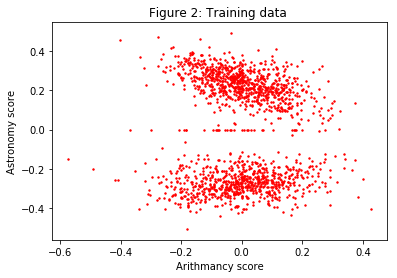

In [94]:
visualize_scatter(df['Arithmancy'], df['Astronomy'], "red")

In [95]:
def visualize_regr(x, y, theta):
    fig = plt.figure()
    ax = plt.axes()
    est = theta[0] + (x*theta[1])
    #print(est.shape)
    #print(x)
    #plt.gca().set(   xlim=(min(x), max(x)), ylim=(min(y), max(y))   )
    ax.scatter(x, y, c="red", s=2)
    plt.plot(x, est, 'blue', linewidth=0.9)
    plt.xlabel(x.name +' score')
    plt.ylabel(y.name +' score')
    plt.title('Figure 2: Training data with decision boundary')
    plt.show()


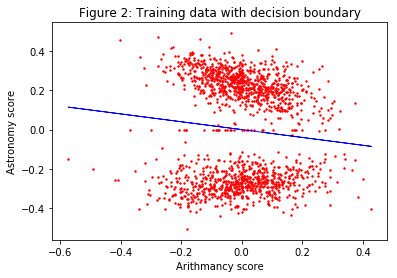

In [96]:
theta = [20, -0.004]
theta = [0,-0.2]
visualize_regr(df['Arithmancy'], df['Astronomy'], theta)

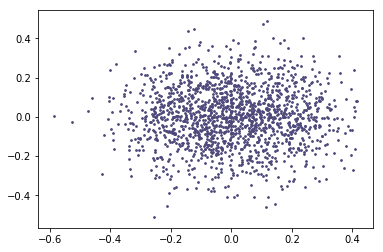

In [97]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x=df['Potions'], y=df['Care of Magical Creatures'], color=np.random.rand(3), s=3)

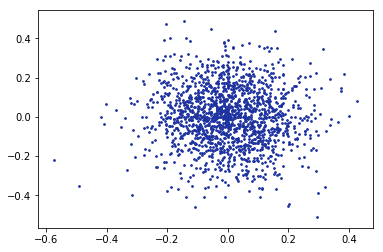

In [98]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x=df['Arithmancy'], y=df['Care of Magical Creatures'], color=np.random.rand(3), s=3)

In [99]:
np.random.rand(4)

array([0.01001822, 0.19781686, 0.13407991, 0.16108318])

In [124]:
def draw_scatters(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,30), dpi= 100)
    for i, var_name1 in enumerate(variables):  
        for j, var_name2 in enumerate(variables):          
            #fig = plt.figure()
            #ax = plt.axes()
            #number = (i+1)*(j+1)
            number = i*len(variables)+j+1
            ax=fig.add_subplot(n_rows, n_cols, number)
            ax.scatter(x=df[var_name1], y=df[var_name2], color=np.random.rand(3), s=1)
            
            if (number-1) % n_cols==0:
                plt.ylabel(var_name1[:6])
            if number > (n_rows-1)* n_cols:
                plt.xlabel(var_name2[:6])
            
            #plt.title('Training data ')
            #plt.show()
    fig.tight_layout()  # Improves appearance a bit.
    plt.rc('font', size=2)
    plt.rc('axes', labelsize=10) 
    plt.show()

12


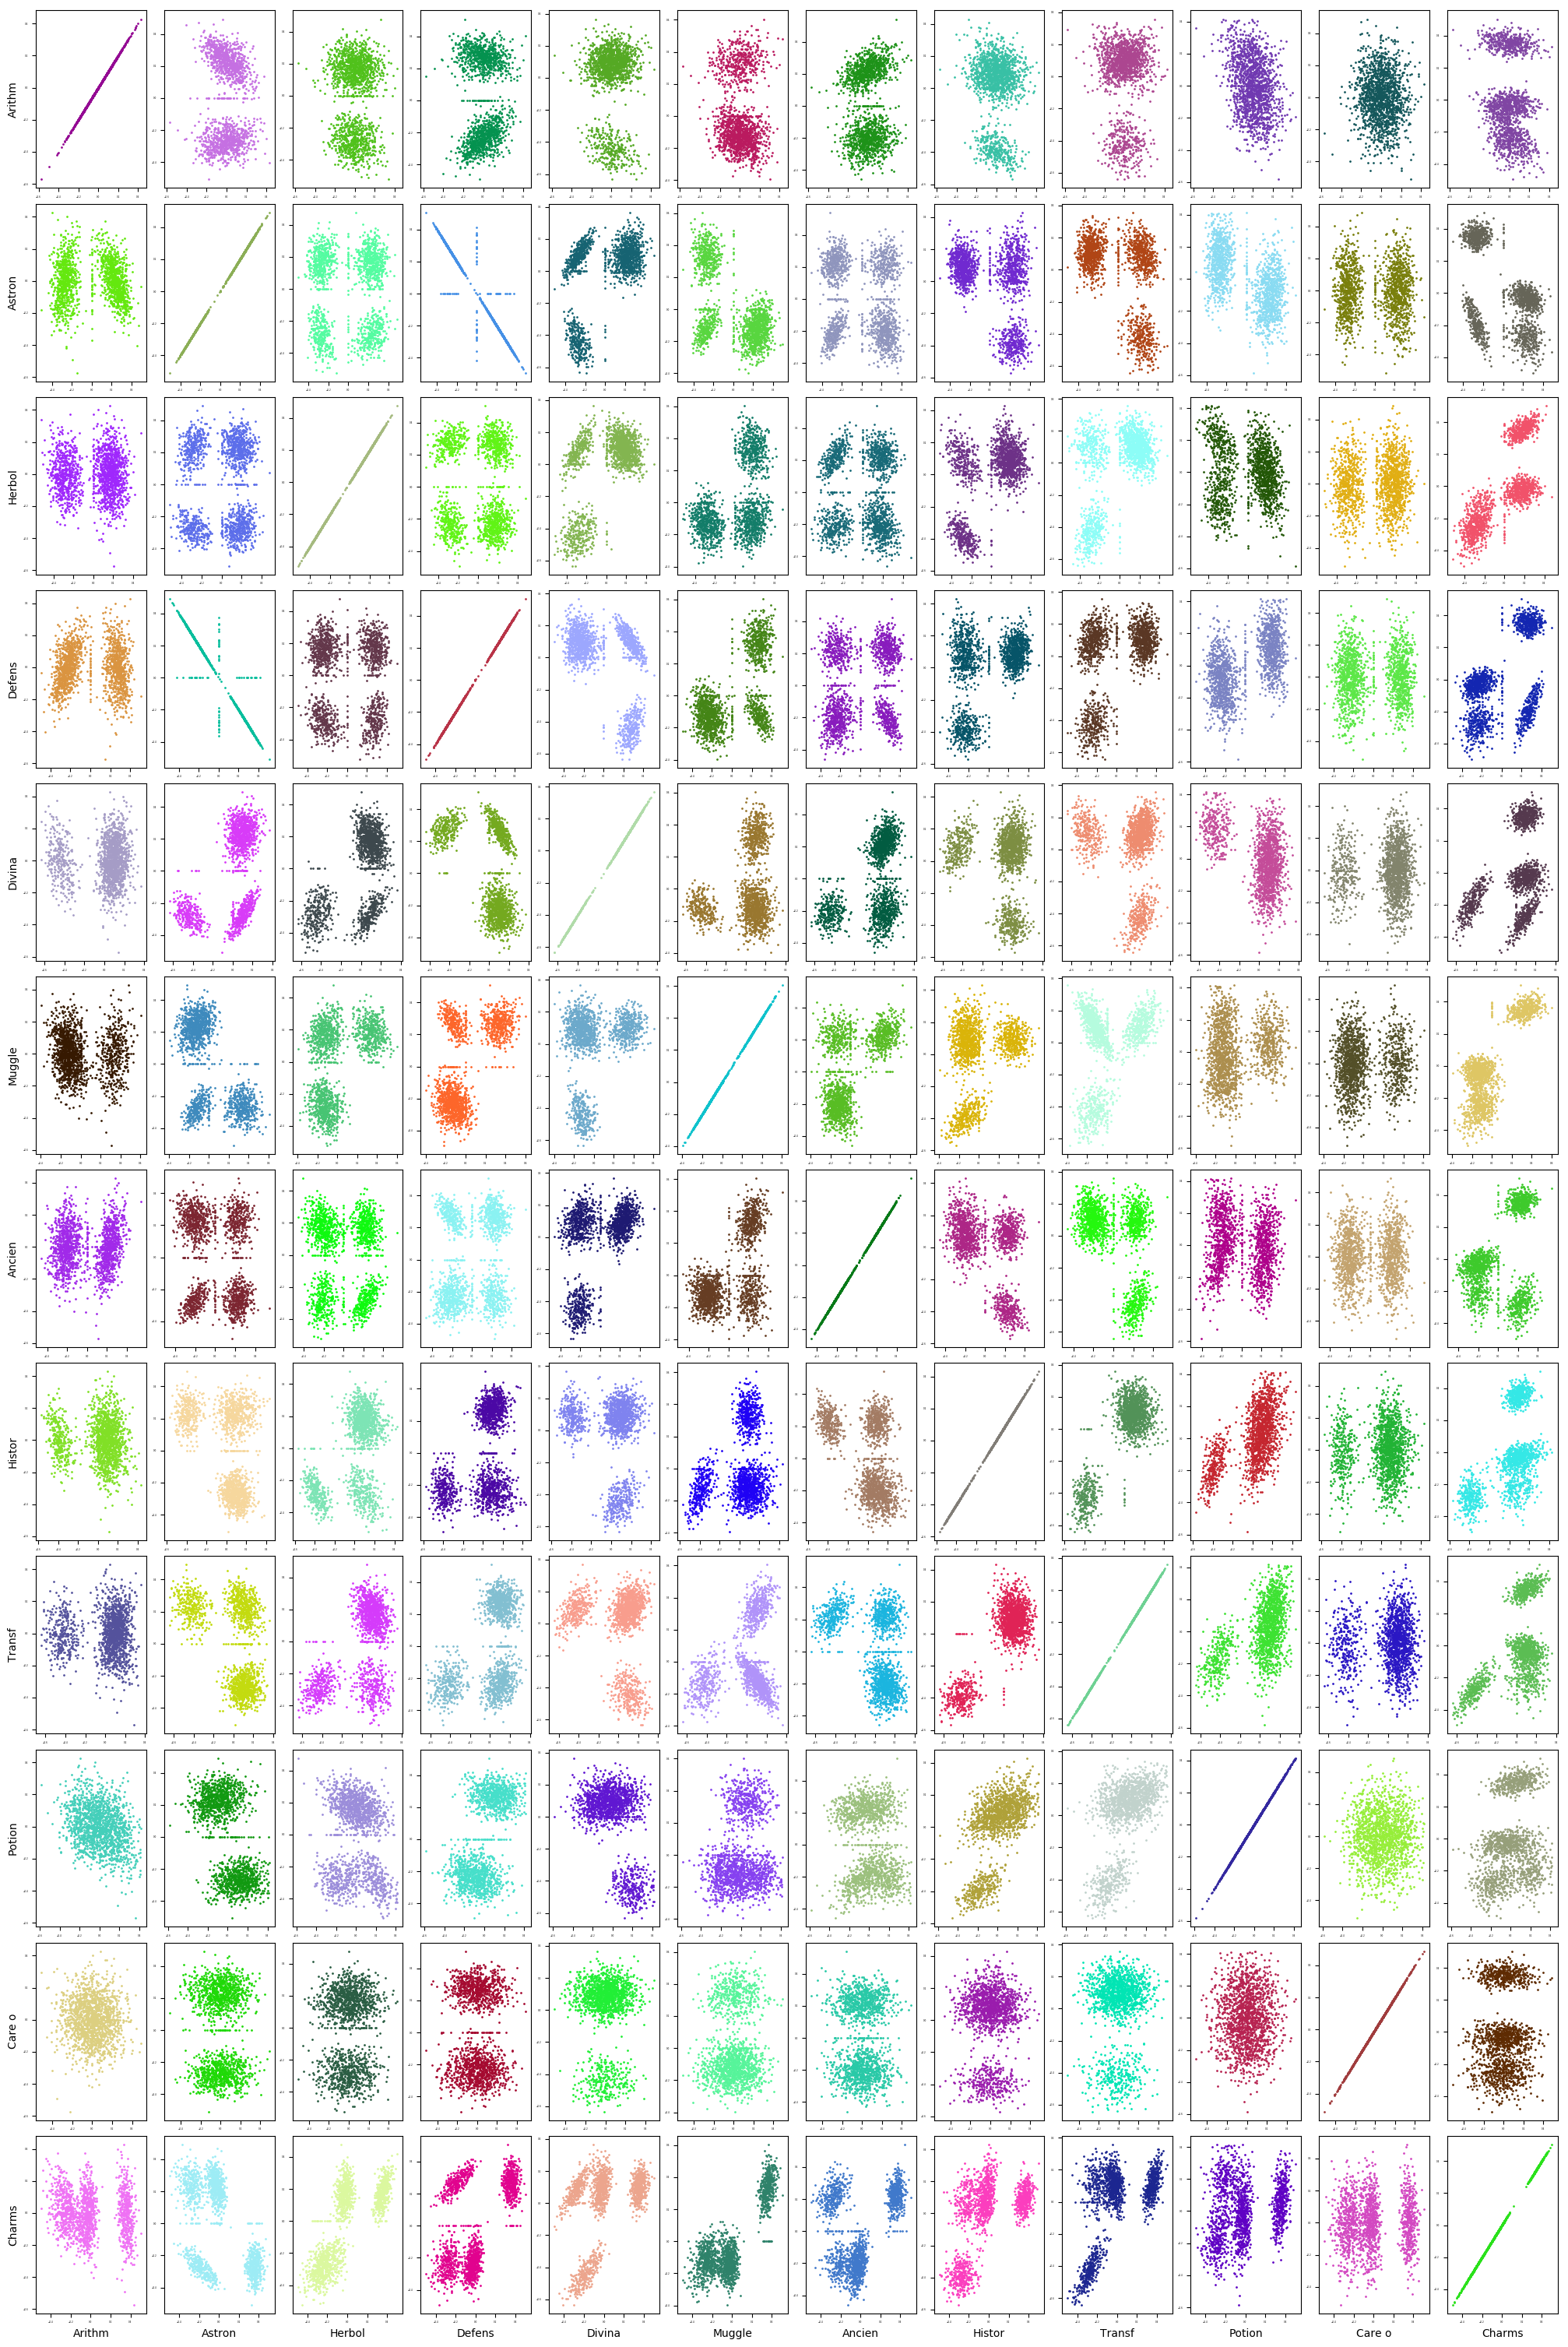

In [125]:
variables = column_list[6:18]
n_rows = len(variables)
n_cols = len(variables)
print(n_rows)
draw_scatters(df, variables, n_rows, n_cols)

### V.2.3 Matplotlib Pair plot

Faites un script nommé pair_plot.[extension] qui affiche un pair plot ou scatter
plot matrix (selon la librairie graphique que vous utiliserez).
À partir de cette visualisation, quelles caractéristiques allez-vous utiliser pour entraîner votre prochaine régression logistique ?

### SEABORN

In [128]:
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

### Cars

In [130]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head(5)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

/Users/agnieszkaslusarczyk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


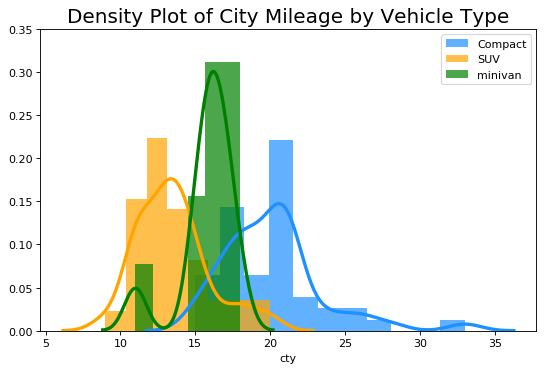

In [17]:
# Draw Plot
plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', 'cty'], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', 'cty'], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', 'cty'], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=18)
plt.legend()
plt.show()

### Hogwarts Houses

In [131]:
df = data
df.head(10)

Index Hogwarts House First Name   Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara         Hsu  2000-03-30      Left   
1      1      Slytherin      Erich     Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany       Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta   Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston       Gibbs  1998-09-27      Left   
5      5      Slytherin    Corrine     Hammond  1999-04-04     Right   
6      6     Gryffindor        Tom       Guido  2000-09-30      Left   
7      7     Hufflepuff     Alicia     Hayward  1997-07-08     Right   
8      8     Gryffindor      Bella  Leatherman  1998-12-07      Left   
9      9     Hufflepuff     Hayden      Aponte  2001-10-13     Right   

   Arithmancy  Astronomy  Herbology  Defense Against the Dark Arts  \
0    0.067654  -0.266110   0.209332                   2.656001e-01   
1    0.136124  -0.298473  -0.325374                   2.979632e-01   
2   -0.200521  -0.204681   0.300522                   2.041715e-01   
3   -0.131200   0.331801  -0.348642                  -3.323108e-01   
4    0.081371   0.200195  -0.409048                   2.799419e-18   
5   -0.219798  -0.329551  -0.247858                   3.290414e-01   
6   -0.003615   0.296653  -0.274002                  -2.971628e-01   
7   -0.128548   0.187405   0.218673                  -1.879149e-01   
8   -0.226997   0.230262  -0.290157                  -2.307713e-01   
9   -0.025661   0.245793   0.309522                  -2.463030e-01   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0    0.083591        0.227927       0.079597          0.109306   
1   -0.467291       -0.120589      -0.277314          0.055140   
2    0.159182        0.408229       0.231487          0.028555   
3    0.046489       -0.143381       0.061176         -0.374613   
4   -0.048932       -0.100819       0.224422         -0.308813   
5   -0.519532       -0.099320      -0.215689          0.116498   
6    0.000000       -0.322322       0.190660         -0.495722   
7   -0.020519       -0.127327      -0.122196          0.000000   
8    0.143989       -0.184481       0.156209         -0.441558   
9    0.010773       -0.079633      -0.334265          0.097140   

   Transfiguration   Potions  Care of Magical Creatures    Charms    Flying  
0         0.050389 -0.118459                   0.120775  0.297028 -0.106067  
1         0.149990  0.071205                   0.022778 -0.247323 -0.294020  
2         0.301519  0.152359                  -0.072509  0.450068  0.018374  
3        -0.570400 -0.281254                   0.006183 -0.378216  0.387984  
4        -0.481785 -0.089903                  -0.033067 -0.365317  0.295353  
5         0.118276  0.318129                   0.173200 -0.128326 -0.123003  
6        -0.554032 -0.236023                   0.032408 -0.405945  0.520241  
7         0.057167  0.034628                  -0.018567 -0.018543  0.109202  
8        -0.545110 -0.266743                   0.188448 -0.249888  0.482373  
9         0.058845 -0.212871                  -0.074746 -0.033712 -0.047874

In [132]:
df.columns

Index(['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday',
       'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying'],
      dtype='object')

### V.2.1 Seaborn Histogram

Faites un script nommé histogram.[extension] qui affiche un histogram répondant
à la question suivante :
Quel cours de Poudlard a une répartition des notes homogènes entre les quatres maisons ?

/Users/agnieszkaslusarczyk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


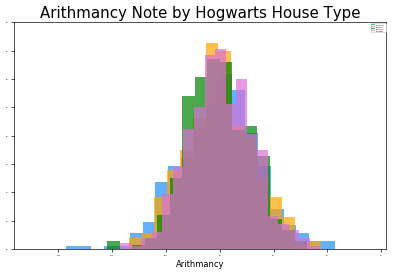

In [133]:
# Draw Plot
plt.figure(figsize=(8,5), dpi= 60)
sns.distplot(df.loc[df['Hogwarts House'] == 'Ravenclaw', 'Arithmancy'], color="dodgerblue", label="Ravenclaw", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})
sns.distplot(df.loc[df['Hogwarts House'] == 'Slytherin', 'Arithmancy'], color="orange", label="Slytherin", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})
sns.distplot(df.loc[df['Hogwarts House'] == 'Gryffindor', 'Arithmancy'], color="green", label="Gryffindor", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})
sns.distplot(df.loc[df['Hogwarts House'] == 'Hufflepuff', 'Arithmancy'], color="orchid", label="Hufflepuff", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})

plt.ylim(0, 4)

# Decoration
plt.title('Arithmancy Note by Hogwarts House Type', fontsize=18)
plt.legend()
plt.show()

In [134]:
def sea_hist (name):
    # Draw Plot
    plt.figure(figsize=(8,5), dpi= 60)
    sns.distplot(df.loc[df['Hogwarts House'] == 'Ravenclaw', name], color="dodgerblue", label="Ravenclaw", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})
    sns.distplot(df.loc[df['Hogwarts House'] == 'Slytherin', name], color="orange", label="Slytherin", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})
    sns.distplot(df.loc[df['Hogwarts House'] == 'Gryffindor', name], color="green", label="Gryffindor", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})
    sns.distplot(df.loc[df['Hogwarts House'] == 'Hufflepuff', name], color="orchid", label="Hufflepuff", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})

    plt.ylim(0, 6)

    # Decoration
    plt.title(name+' Note by Hogwarts House Type', fontsize=18)
    plt.legend()
    plt.show()

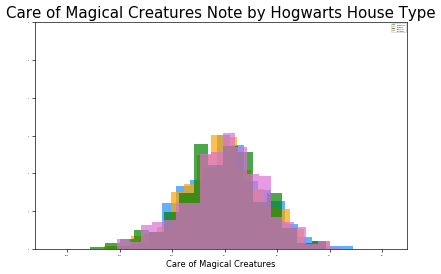

In [135]:
#for name in columns_list :
sea_hist ('Care of Magical Creatures')

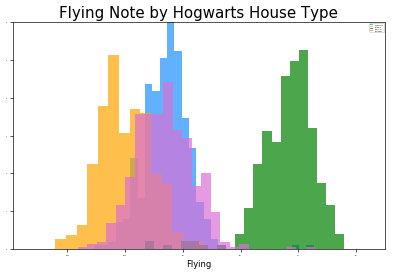

In [136]:
sea_hist("Flying")

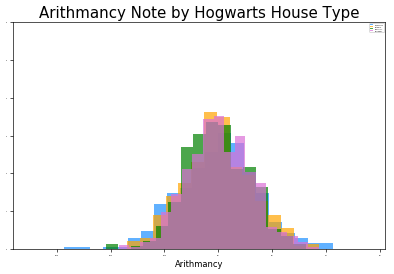

In [137]:
sea_hist("Arithmancy")

In [23]:
variables = column_list[6:19]
def draw_sea_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,16), dpi= 100)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        #print(var_name)
        #cours = data[var_name]
        sea_hist(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

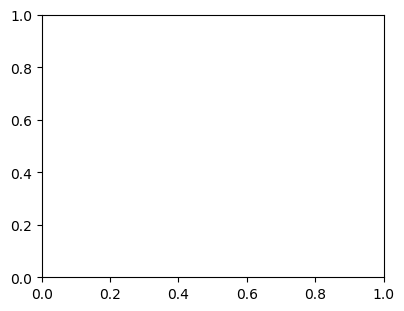

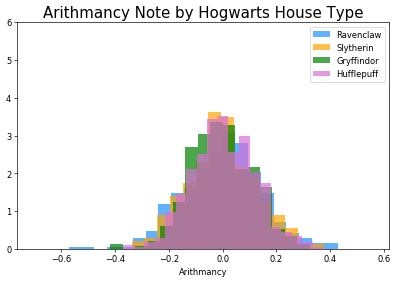

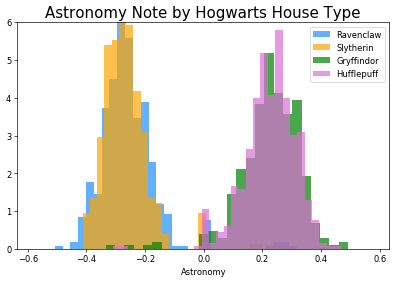

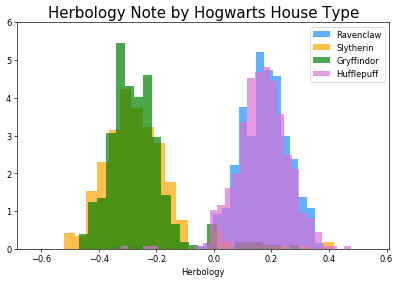

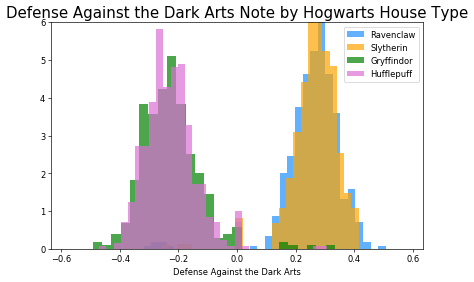

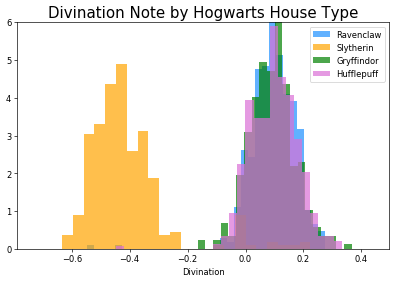

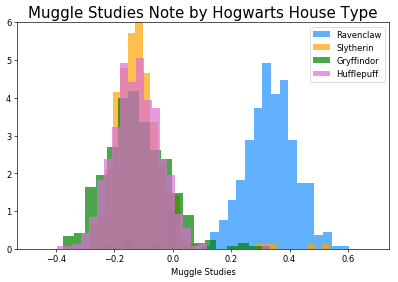

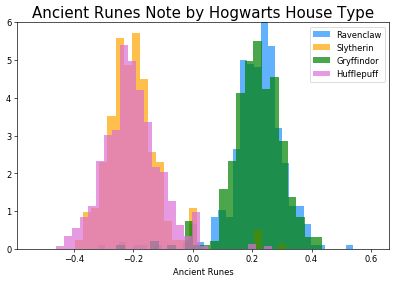

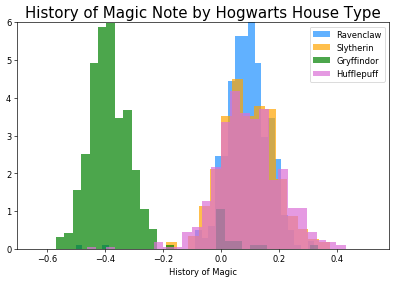

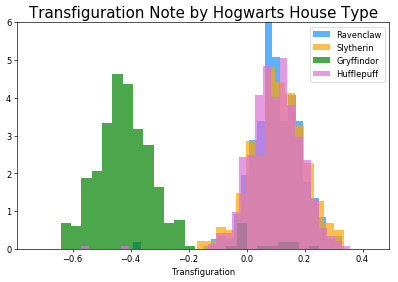

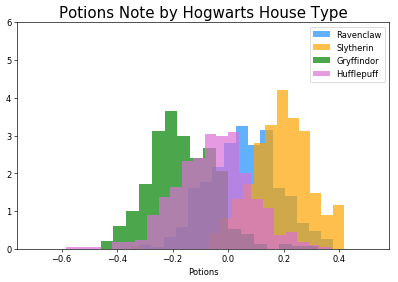

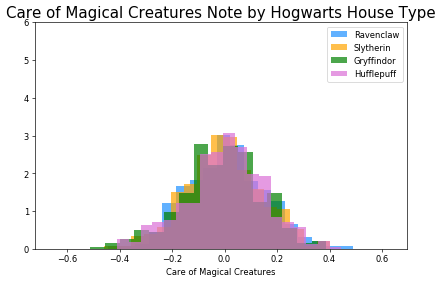

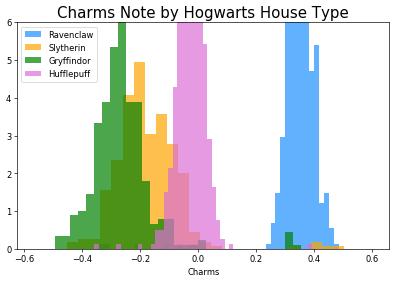

ValueError: num must be 1 <= num <= 12, not 13

In [24]:
draw_sea_histograms(df, variables, 4, 3)

### V.2.2 Seaborn Scatter plot

Faites un script nommé scatter_plot.[extension] qui affiche un scatter plot répondant à la question suivante :
Quelles sont les deux features qui sont semblables ?

### V.2.3 Seaborn Pair plot

Faites un script nommé pair_plot.[extension] qui affiche un pair plot ou scatter
plot matrix (selon la librairie graphique que vous utiliserez).
À partir de cette visualisation, quelles caractéristiques allez-vous utiliser pour entraîner votre prochaine régression logistique ?

/Users/agnieszkaslusarczyk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


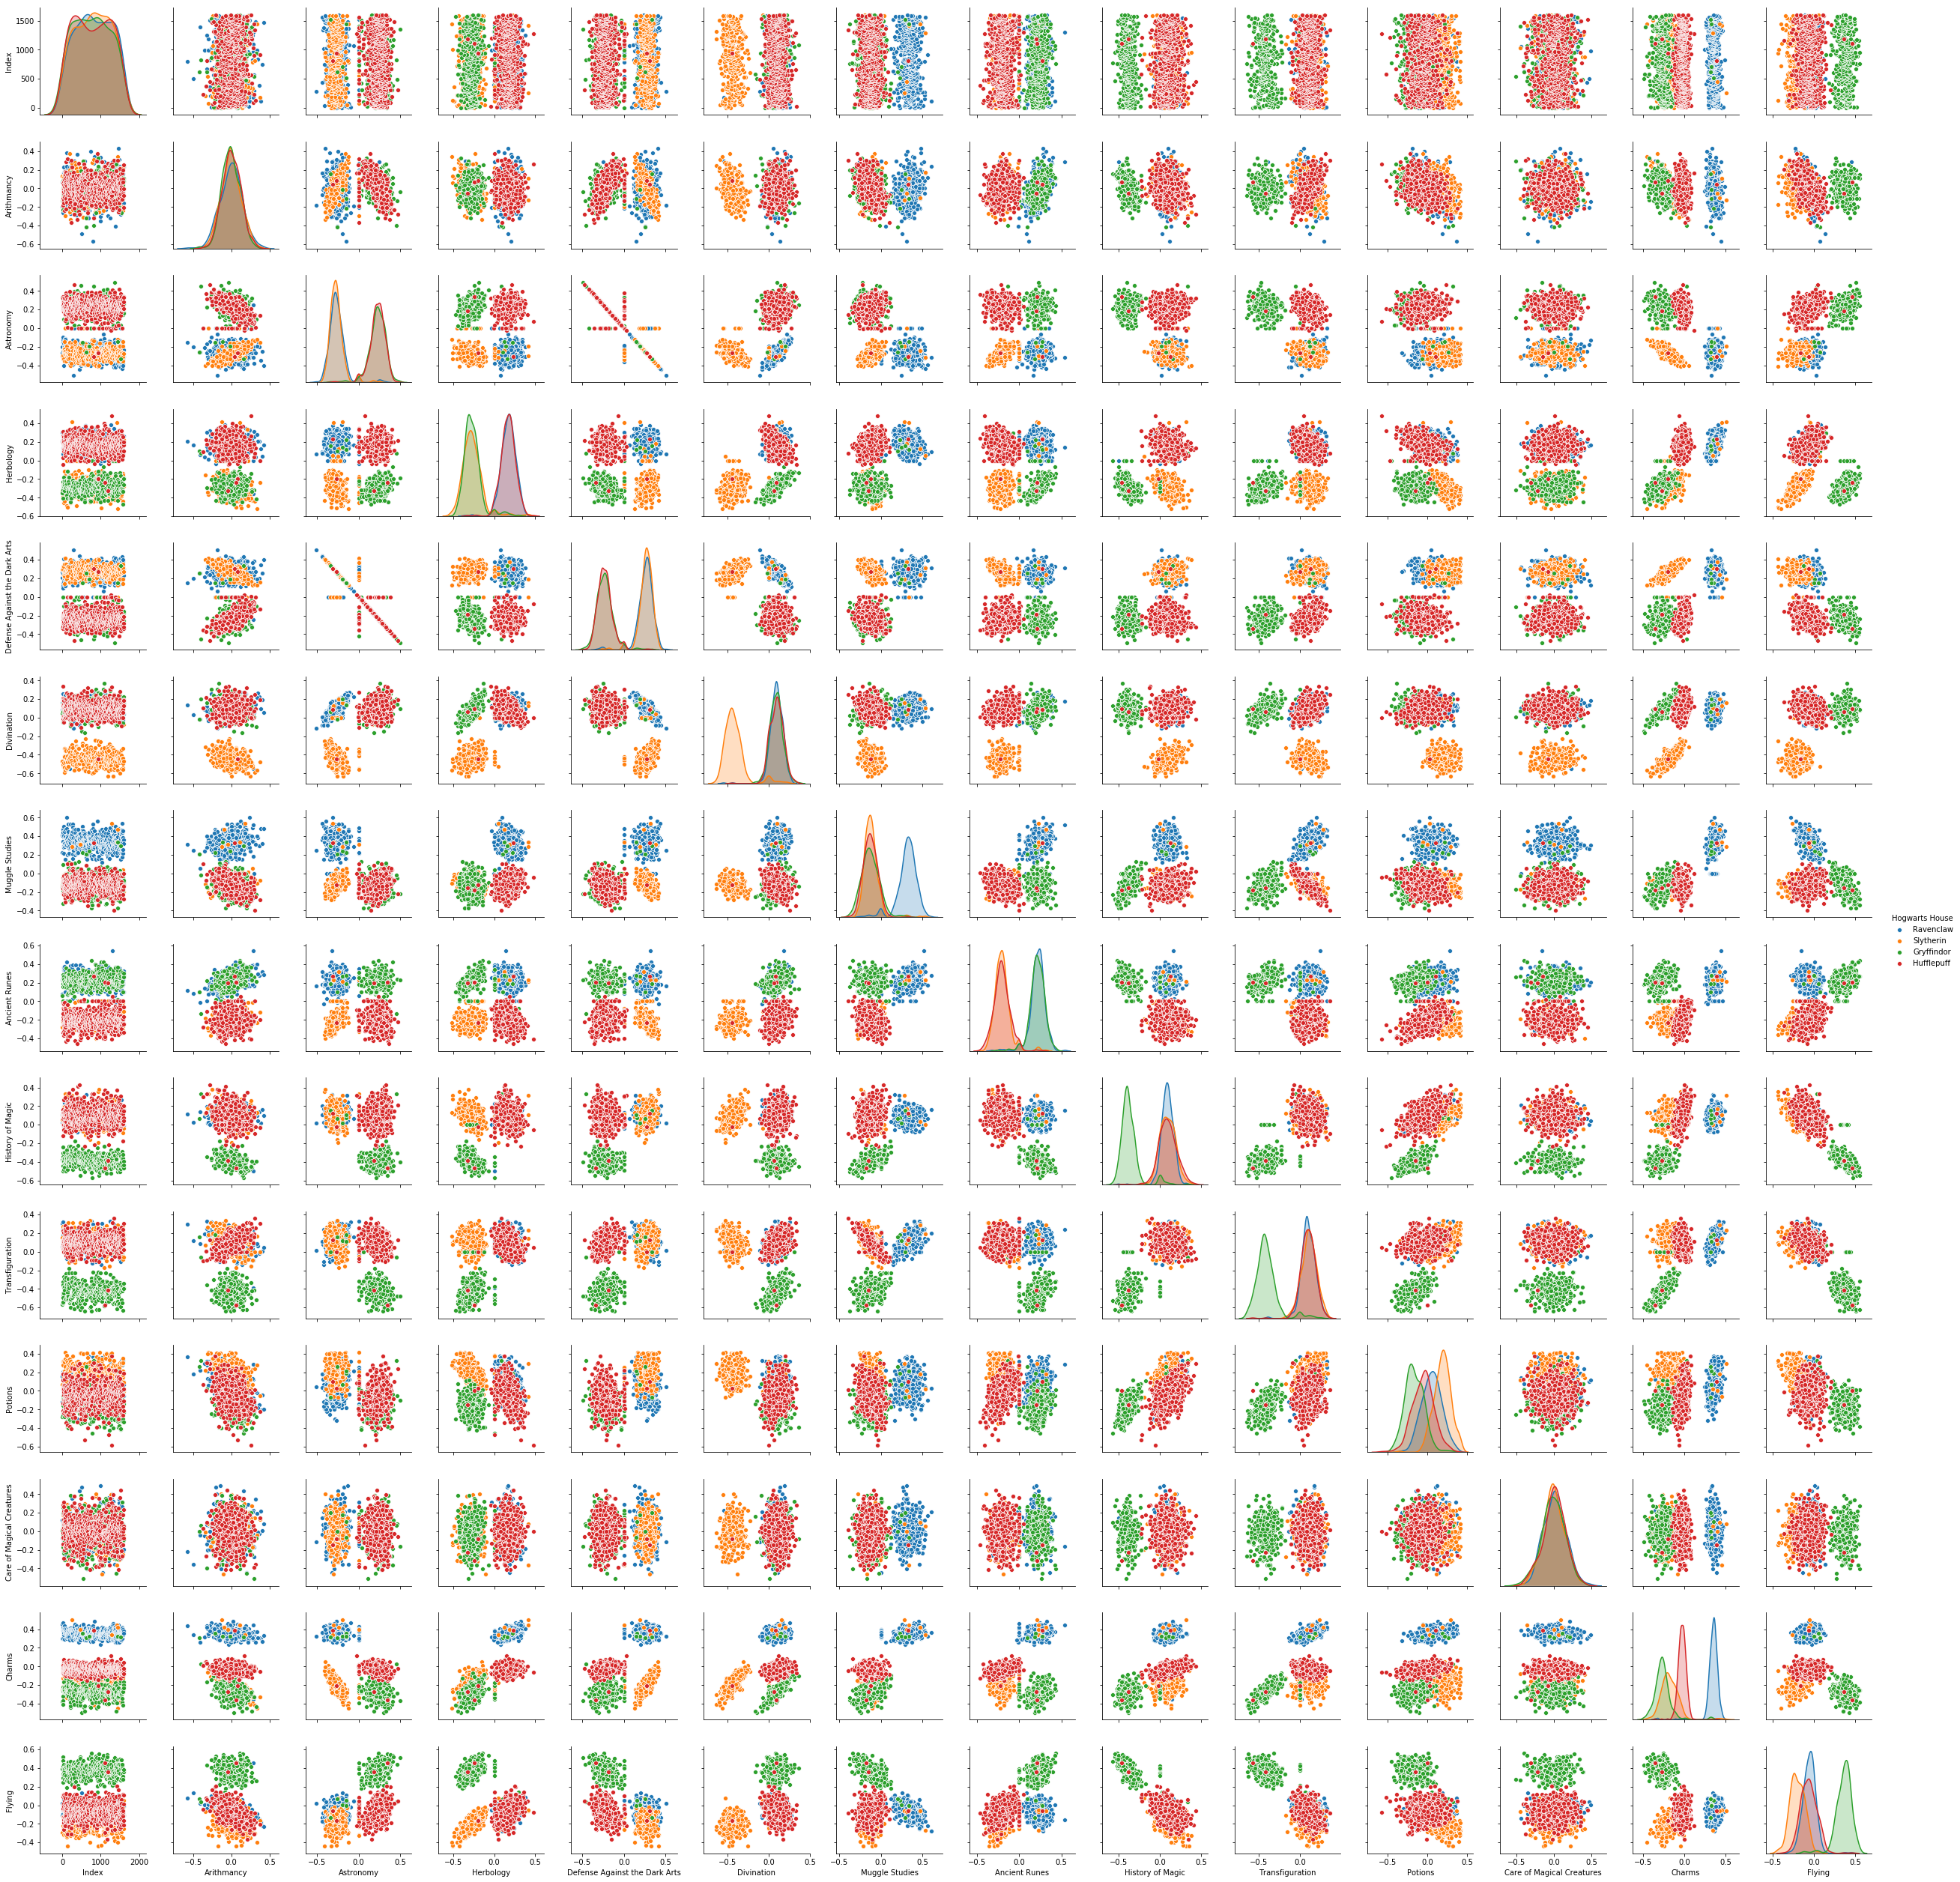

In [25]:
sns.pairplot(data=df, hue="Hogwarts House");